# Lab 1 Introduction to Keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

%matplotlib inline

Using TensorFlow backend.


# Loading train data

In [2]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


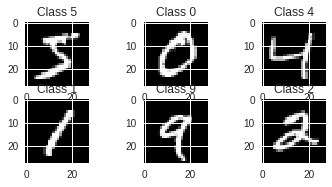

In [3]:
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

# Format the data for training
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training shape", X_train.shape)
print("Testing shape", X_test.shape)

Training shape (60000, 784)
Testing shape (10000, 784)


Modify the target matrices to be in the one-hot format

In [0]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Lab 1.1 Dense Layer

Lab 1.1 We only have dense layer.

Dense layers are keras alias for Fully connected layers. These layers give the ability to classify the features learned by the CNN.

Dense layers have 512 neurons and activation function is 'relu'.

The last layer is the Dense layer with 10 neurons and activation function is Softmax . The neurons in this layer should be equal to the number of classes we want to predict as this is the output layer. 

function -> Dense(units , activation = 'activation')(previous_layer)


If you create model success your model must have model.summary() like below :

<!-- <img src="dense.PNG"> -->

![](https://i.imgur.com/wmaw5AI.png)

In [6]:
# create only dense layer
input_tensor = Input(shape = (784,))

### To Do ###


previous_layer = Dense(512, activation = 'relu')(input_tensor)



######

pred = Dense(10, activation = 'softmax')(previous_layer)
model = Model(inputs = input_tensor, outputs = pred)
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 94us/step - loss: 0.3032 - acc: 0.9133 - val_loss: 0.1532 - val_acc: 0.9560
Epoch 2/10
48000/48000 [==============================] - 2s 40us/step - loss: 0.1251 - acc: 0.9639 - val_loss: 0.1137 - val_acc: 0.9666
Epoch 3/10
48000/48000 [==============================] - 2s 40us/step - loss: 0.0810 - acc: 0.9766 - val_loss: 0.0982 - val_acc: 0.9697
Epoch 4/10
48000/48000 [==============================] - 2s 40us/step - loss: 0.0588 - acc: 0.9831 - val_loss: 0.0881 - val_acc: 0.9723
Epoch 5/10
48000/48000 [==============================] - 2s 40us/step - loss: 0.0434 - acc: 0.9878 - val_loss: 0.0780 - val_acc: 0.9767
Epoch 6/10
48000/48000 [==============================] - 2s 40us/step - loss: 0.0316 - acc: 0.9910 - val_loss: 0.0826 - val_acc: 0.9754
Epoch 7/10
48000/48000 [==============================] - 2s 40us/step - loss: 0

In [8]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.06490967417707434
Test accuracy: 0.9816


In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Text(0, 0.5, 'Loss')

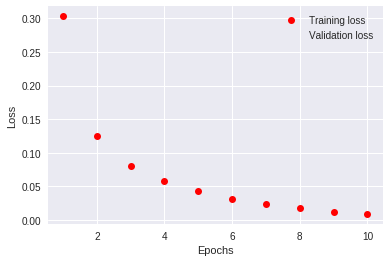

In [10]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'ro', label='Training loss')
plt.plot(epochs, val_loss_values, 'b+', label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

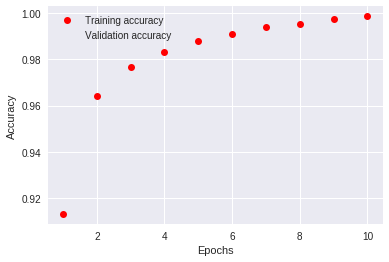

In [11]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b+', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Lab1.2 Dense + Dropout Layer

Lab 1.2 We have 2 dense layer and dropout layer.

Dense layers have 512 neurons and activation function is 'relu'.

Dropout is the method used to reduce overfitting. It forces the model to learn multiple independent representations of the same data by randomly disabling neurons in the learning phase. In our model, dropout will randomnly disable 20% of the neurons.

The last layer is the Dense layer with 10 neurons and activation function is Softmax .


function -> Dense(units , activation = 'activation')(previous_layer)

function -> Dropout(rate)(previous_layer)

If you create model success your model must have model.summary() like below :

<!-- <img src="dense+drop.PNG"> -->

![](https://i.imgur.com/G818tiC.png)

In [14]:
# create only dense + dropout layer
input_tensor = Input(shape = (784,))

### To Do ###

previous_layer = Dense(512, activation='relu')(input_tensor)
dropout_layer = Dropout(0.2)(previous_layer)
pred = Dense(10, activation='softmax')(dropout_layer)

######

model = Model(inputs = input_tensor, outputs = pred)
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 48us/step - loss: 0.3164 - acc: 0.9094 - val_loss: 0.1567 - val_acc: 0.9566
Epoch 2/10
48000/48000 [==============================] - 2s 42us/step - loss: 0.1383 - acc: 0.9595 - val_loss: 0.1169 - val_acc: 0.9663
Epoch 3/10
48000/48000 [==============================] - 2s 42us/step - loss: 0.0948 - acc: 0.9723 - val_loss: 0.0920 - val_acc: 0.9723
Epoch 4/10
48000/48000 [==============================] - 2s 42us/step - loss: 0.0702 - acc: 0.9790 - val_loss: 0.0836 - val_acc: 0.9744
Epoch 5/10
48000/48000 [==============================] - 2s 42us/step - loss: 0.0560 - acc: 0.9835 - val_loss: 0.0822 - val_acc: 0.9751
Epoch 6/10
48000/48000 [==============================] - 2s 42us/step - loss: 0.0440 - acc: 0.9873 - val_loss: 0.0750 - val_acc: 0.9762
Epoch 7/10
48000/48000 [==============================] - 2s 42us/step - loss: 0.0373 - acc: 0.9885 - val_loss: 0.0763 - val_acc

In [16]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.06136312005497748
Test accuracy: 0.9809


In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Text(0, 0.5, 'Loss')

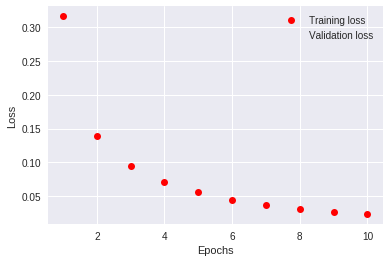

In [18]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'ro', label='Training loss')
plt.plot(epochs, val_loss_values, 'b+', label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

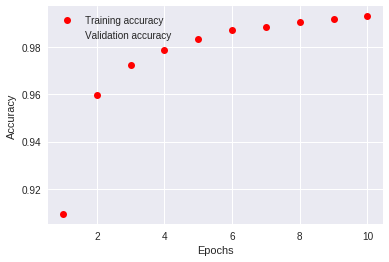

In [19]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b+', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Lab 1.3 Convolutional Neural Network (CNN)

We also need to specify the shape of the input which is (28, 28, 1), but we have to specify it only once.

The second layer is the Activation layer. We have used ReLU (rectified linear unit) as our activation function. ReLU function is f(x) = max(0, x), where x is the input. It sets all negative values

The third layer is the MaxPooling layer. MaxPooling layer is used to down-sample the input to enable the model to make assumptions about the features so as to reduce over-fitting

After creating all the convolutional layers, we need to flatten them, so that they can act as an input to the Dense layers.

Dense layers have 512 neurons and activation function is 'relu'.

Dropout will randomnly disable 20% of the neurons.

The last layer is the Dense layer with 10 neurons and activation function is Softmax . 

Our model have architecture belowing:

![](https://pbs.twimg.com/media/DJDu-seXcAAvqZf.jpg:large)

*(Source: https://twitter.com/DeepLearn007/status/905486345862344704)*

Try to create model like architecture.

Function :

    1. Conv2D(filters, kernel_size, activation = 'activation')(previous_layer)
    2. MaxPooling2D(pool_size)(previous_layer)
    3. Dropout(rate)(previous_layer)
    4. Flatten()(previous_layer)
    5. Dense(units , activation = 'activation')(previous_layer)

If you create model success your model must have model.summary() like below :

<!-- <img src="cnn.PNG"> -->

![](https://i.imgur.com/pqAwq0g.png)

In [20]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28 ,28 ,1)
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training shape", X_train.shape)
print("Testing shape", X_test.shape)

Training shape (60000, 28, 28, 1)
Testing shape (10000, 28, 28, 1)


In [23]:
input_tensor = Input(shape = (28,28,1))

### To Do ###
input_tensor = Input(shape = (28,28,1))
conv1 = Conv2D(32, kernel_size=3, activation='relu')(input_tensor)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)

conv3 = Conv2D(64, kernel_size=3, activation='relu')(pool1)
conv4 = Conv2D(64, kernel_size=3, activation='relu')(conv3)
pool2 = MaxPooling2D(pool_size=(2,2))(conv4)

flatten_layer = Flatten()(pool2)

hidden_layer = Dense(512, activation='relu')(flatten_layer)
drop_layer = Dropout(0.2)(hidden_layer)
pred = Dense(10, activation='softmax')(drop_layer)

######

model = Model(inputs = input_tensor, outputs = pred)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
early_stopping = EarlyStopping(patience=0, verbose=1)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
__________

In [24]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=10,
                    verbose=1, validation_split=0.2,
                    callbacks = [early_stopping])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 167us/step - loss: 0.9413 - acc: 0.6766 - val_loss: 0.2701 - val_acc: 0.9160
Epoch 2/10
48000/48000 [==============================] - 5s 111us/step - loss: 0.2215 - acc: 0.9309 - val_loss: 0.1430 - val_acc: 0.9572
Epoch 3/10
48000/48000 [==============================] - 5s 111us/step - loss: 0.1380 - acc: 0.9574 - val_loss: 0.1084 - val_acc: 0.9668
Epoch 4/10
48000/48000 [==============================] - 5s 110us/step - loss: 0.1051 - acc: 0.9678 - val_loss: 0.0914 - val_acc: 0.9727
Epoch 5/10
48000/48000 [==============================] - 5s 110us/step - loss: 0.0887 - acc: 0.9720 - val_loss: 0.0778 - val_acc: 0.9779
Epoch 6/10
48000/48000 [==============================] - 5s 111us/step - loss: 0.0759 - acc: 0.9763 - val_loss: 0.0730 - val_acc: 0.9782
Epoch 7/10
48000/48000 [==============================] - 5s 110us/step - loss: 0.0645 - acc: 0.9788 - val_loss: 0.0652 - 

In [25]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.05793988735387102
Test accuracy: 0.9806


In [26]:
history_dict = history.history

history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Text(0, 0.5, 'Loss')

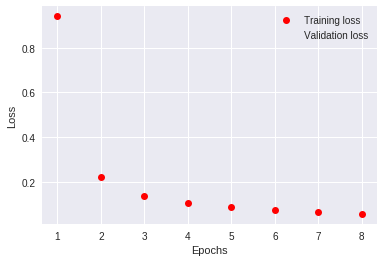

In [27]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'ro', label='Training loss')
plt.plot(epochs, val_loss_values, 'b+', label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

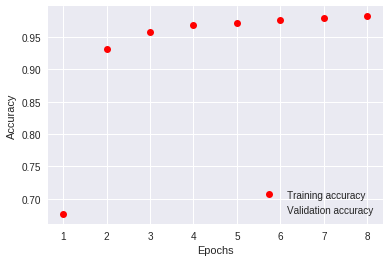

In [28]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b+', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Confusion matrix

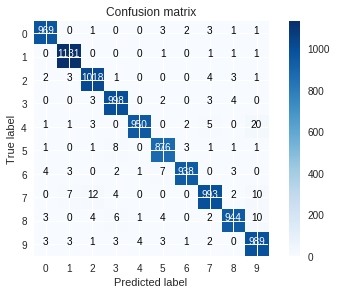

In [29]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

# Inspecting the output

In [0]:
predicted = model.predict(X_test)
predicted_classes = np.argmax(predicted,axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

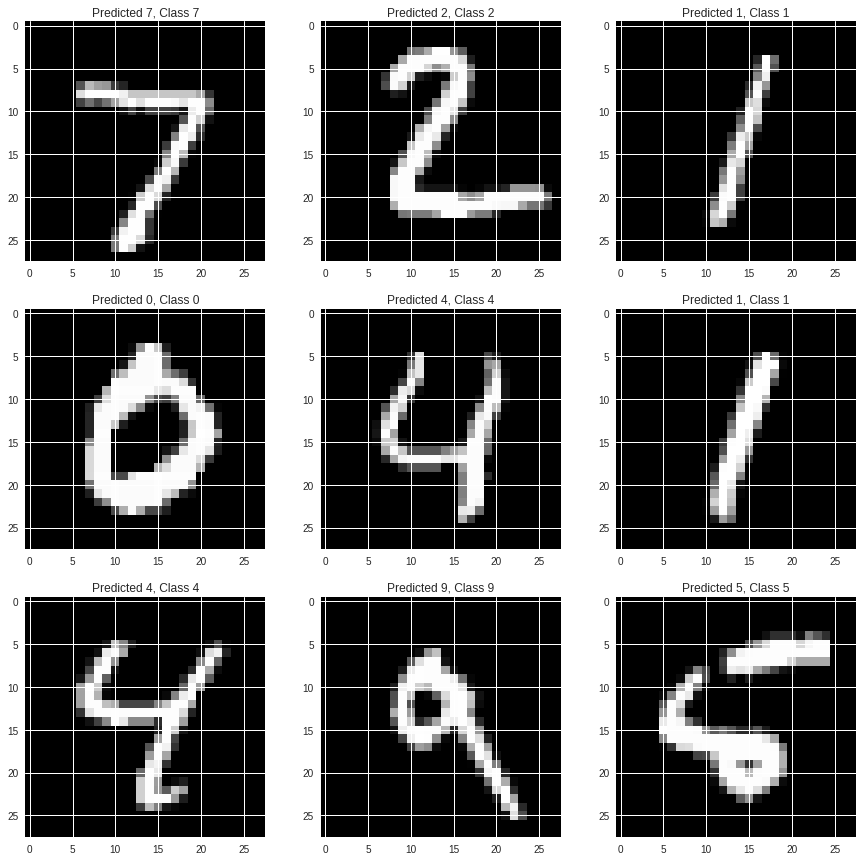

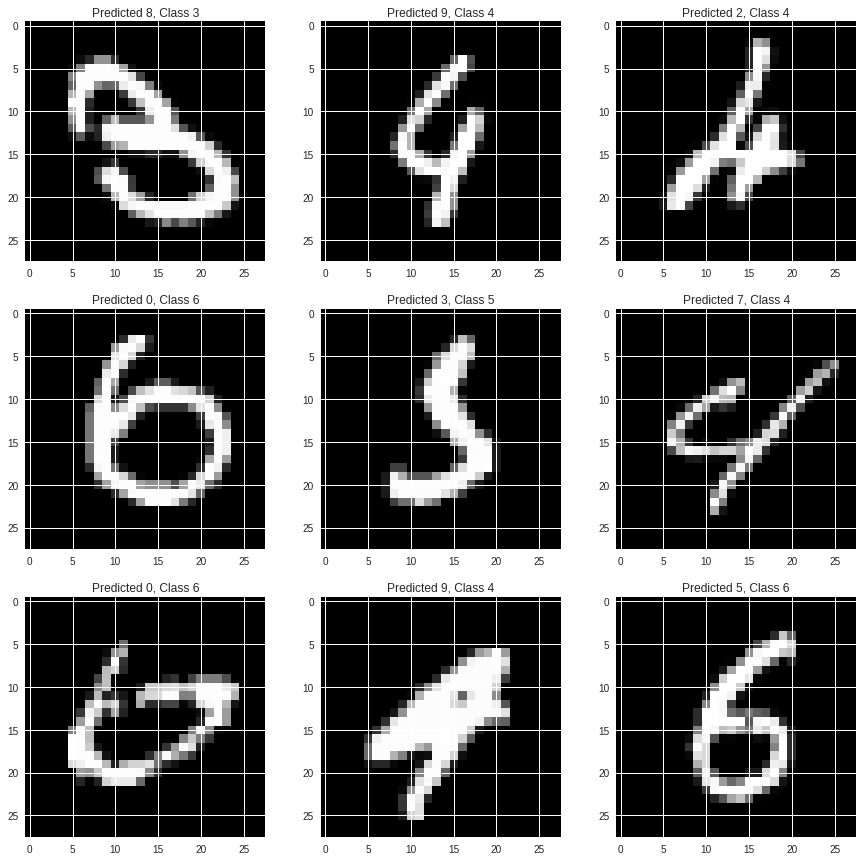

In [31]:
plt.rcParams['figure.figsize'] = (15,15) 
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

# Feature Visualization

In [0]:
input_tensor = Input(shape = (28,28,1))
conv1 = Conv2D(32, kernel_size=3,activation = 'relu')(input_tensor)
conv2 = Conv2D(32, kernel_size=3,activation = 'relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
conv3 = Conv2D(64, kernel_size=3,activation = 'relu')(pool1)
conv4 = Conv2D(64, kernel_size=3,activation = 'relu')(conv3)
pool2 = MaxPooling2D(pool_size=(2,2))(conv4)

flatten_layer = Flatten()(pool2)

hidden_layer = Dense(512 , activation = 'relu')(flatten_layer)
drop_layer = Dropout(0.2)(hidden_layer)

pred = Dense(10, activation = 'softmax')(drop_layer)

model = Model(inputs = input_tensor, outputs = pred)

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

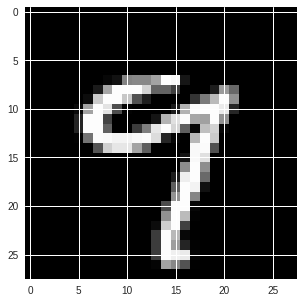

In [33]:
test = X_train[154]

plt.rcParams['figure.figsize'] = (5,5) 
plt.imshow(test.reshape(28,28), cmap='gray', interpolation='none')

In [34]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[1:7]]
activation_model = models.Model(input=model.input, output=layer_outputs)
activations = activation_model.predict(test.reshape(1,28,28,1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=[<tf.Tenso...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
model.layers[:7]

# Visualization Conv2D

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


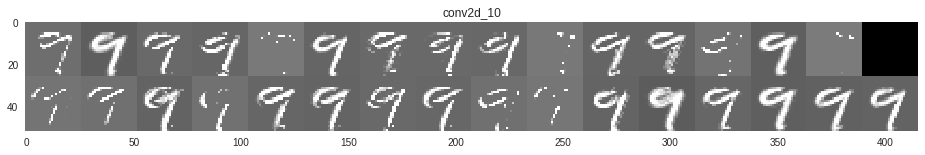

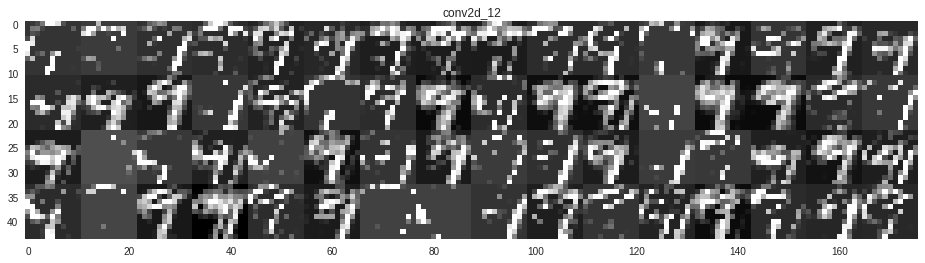

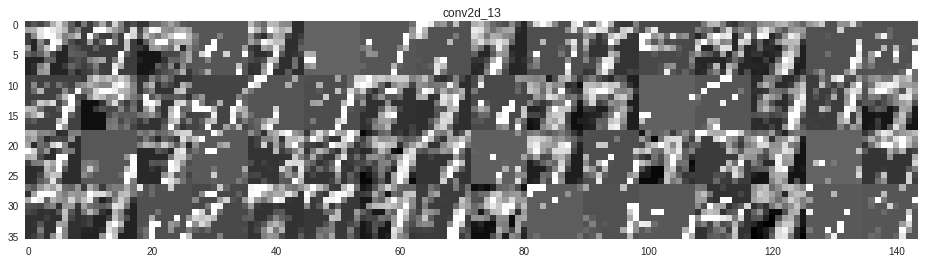

In [36]:
layer_names = []
for layer in model.layers[1:7]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='gray')

# Visualization Max pooling2D

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


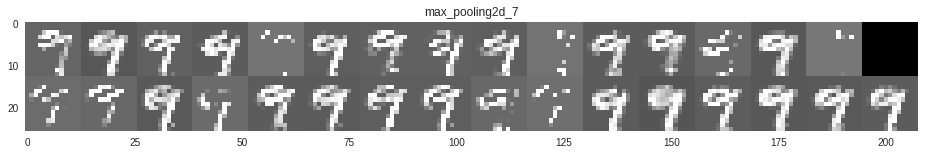

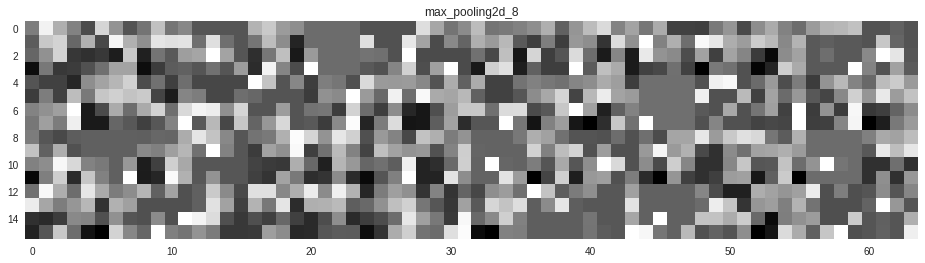

In [37]:
layer_names = []
for layer in model.layers[1:7]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('max'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='gray')